# Project 3: Part 3 Modeling

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
import datetime as dt
import numpy as np
import pickle
from tqdm import tqdm

%matplotlib inline

from sklearn import metrics

import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

In [3]:
with open("users.pkl", 'rb') as picklefile: 
    users = pickle.load(picklefile)

In [4]:
y = users['US']
users = users.drop('US', axis = 1)

In [5]:
users = users.drop('id',axis = 1)

In [17]:
users.shape

(88908, 114)

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: US, dtype: uint8

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(users.iloc[:,:], y, test_size=0.2,stratify = y)#, random_state = 1234)

In [9]:
xtrain.head()

,gender_FEMALE,gender_MALE,gender_OTHER,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,...,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,diff_account_to_first_active,age,total_sessions,total_sessions_on_mac,total_sessions_on_windows,total_sessions_on_iphone,total_sessions_on_android,no_age_entered
38,1,0,0,0,0,0,0,1,0,0,...,0,0,0,57.000000,0.0,0.0,0.0,0.0,0.0,0
78932,0,0,0,0,0,0,0,1,0,0,...,0,0,0,62.000000,77.0,64.0,0.0,0.0,0.0,0
46765,0,0,0,0,0,0,0,1,0,0,...,0,1,0,36.924928,0.0,0.0,0.0,0.0,0.0,1
17726,1,0,0,0,0,0,0,1,0,0,...,0,1,0,39.000000,0.0,0.0,0.0,0.0,0.0,0
74566,0,0,0,0,0,0,0,1,0,0,...,0,1,0,27.000000,64.0,0.0,64.0,0.0,0.0,0


## KNN

In [10]:
normalizer = preprocessing.Normalizer()
users_norm = normalizer.fit_transform(users)

In [11]:
xtrain_norm, xtest_norm, ytrain_norm, ytest_norm = train_test_split(users_norm, y, test_size=0.2,stratify = y)#, random_state = 1234)

In [59]:
k_range = list(range(1,31))
k_auc = []
for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain_norm, ytrain_norm)
    y_score = knn.predict_proba(xtest_norm)[:,1]
    fpr, tpr,_ = roc_curve(ytest_norm, y_score)
    roc_auc = auc(fpr, tpr)
    k_auc.append(roc_auc)
print(k_auc)

100%|██████████| 30/30 [27:38<00:00, 55.29s/it]

[0.50419819099287699, 0.50852665949951537, 0.51478406596498061, 0.52007624066674896, 0.52319276578406493, 0.52602900166264321, 0.52664740825158884, 0.52496223651372831, 0.5251972571485537, 0.52698431723065498, 0.52897678530227965, 0.52777865510557564, 0.52949720809623779, 0.53083783545987773, 0.52960298588509214, 0.53185222527210063, 0.53052967816167473, 0.52921232704716015, 0.52949514631297645, 0.52861185721735549, 0.53003906437332926, 0.52957926404910816, 0.53057570199755066, 0.52960221554848907, 0.53032170993579386, 0.52894599449511426, 0.52955746050231234, 0.53050377370531532, 0.53069925794683392, 0.52943953103115959]


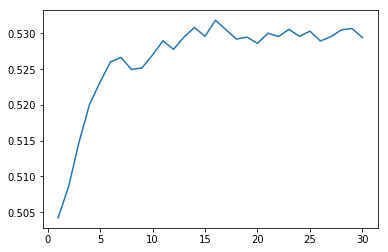

In [63]:
plt.plot(k_range, k_auc)
plt.savefig('knn_k_auc')

In [61]:
np.argmax(np.array(k_auc))

15

In [69]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(xtrain_norm, ytrain_norm)
y_pred = knn.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn.predict(xtest_norm)))

Accuracy: 0.669
             precision    recall  f1-score   support

          0       0.33      0.11      0.16      5307
          1       0.70      0.91      0.79     12475

avg / total       0.59      0.67      0.60     17782

[[  564  4743]
 [ 1143 11332]]


In [67]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain_norm, ytrain_norm)
y_pred = knn5.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn5.predict(xtest_norm)))

Accuracy: 0.641
             precision    recall  f1-score   support

          0       0.32      0.18      0.23      5307
          1       0.71      0.84      0.77     12475

avg / total       0.59      0.64      0.61     17782

[[  943  4364]
 [ 2023 10452]]


## SVMs

### Linear

In [29]:
l_svm = SVC(kernel='linear')
l_svm.fit(xtrain_norm, ytrain_norm)
y_pred = l_svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,l_svm.predict(xtest_norm)))

Accuracy: 0.702


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      5307
          1       0.70      1.00      0.82     12475

avg / total       0.49      0.70      0.58     17782

[[    0  5307]
 [    0 12475]]


### RBF

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma = 0.001)
rbf_svm.fit(xtrain_norm, ytrain_norm)
y_pred = svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,rbf_svm.predict(xtest_norm)))

## Logistic Regression

In [19]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, lr.predict(xtest)))
print(metrics.classification_report(ytest, lr.predict(xtest)))
print(metrics.confusion_matrix(ytest,lr.predict(xtest)))
# Needs work: print(cross_val_score(lr, xtest, ytest, cv=10, scoring='f1'))

Accuracy: 0.534
             precision    recall  f1-score   support

          0       0.33      0.53      0.40      5294
          1       0.73      0.53      0.62     12488

avg / total       0.61      0.53      0.55     17782

[[2812 2482]
 [5813 6675]]


## Random Forests

In [32]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf.predict(xtest)))
print(metrics.classification_report(ytest, rf.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf.predict(xtest)))

Accuracy: 0.647
             precision    recall  f1-score   support

          0       0.34      0.19      0.24      5294
          1       0.71      0.84      0.77     12488

avg / total       0.60      0.65      0.61     17782

[[ 1012  4282]
 [ 1999 10489]]


In [50]:
n_range = list(range(10,100))
n_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain, ytrain)
    y_score = rf.predict_proba(xtest)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    n_auc.append(roc_auc)
print(n_auc)

100%|██████████| 90/90 [11:44<00:00,  7.83s/it]

[0.5240484283877388, 0.52583285394099222, 0.52621892158141637, 0.52422492574359858, 0.5245664020308004, 0.52504057087096778, 0.5237840567216534, 0.52351689431449966, 0.52785975632186799, 0.52878292439170016, 0.52234635616644565, 0.52897598468235585, 0.52730947361147851, 0.5297342797026211, 0.52607210137447846, 0.52766437419514722, 0.52675335984048277, 0.52507094381441088, 0.52940093362313878, 0.52694617055266901, 0.52635500235118049, 0.526294475790828, 0.52608549541900995, 0.52555035380243842, 0.52504727167472542, 0.52611051376983409, 0.52339368574337597, 0.52811424316796329, 0.52557115200823246, 0.52662272441914471, 0.52613092626344793, 0.52539016980290498, 0.52798619428712756, 0.52878867982246713, 0.52733621632263761, 0.52710116634522985, 0.52633832597162566, 0.52846772947363807, 0.52745347282541222, 0.52808079965304655, 0.52708493618172647, 0.5272252295335369, 0.5276590649804318, 0.5276889387669359, 0.52678790755105254, 0.52734595744593316, 0.52894036302806868, 0.52674887499101519, 

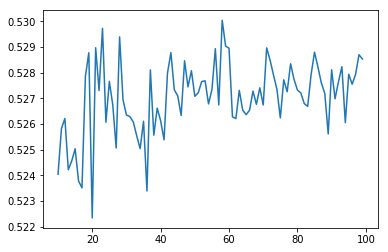

In [51]:
plt.plot(n_range, n_auc)
plt.savefig('rf_n_auc')

In [52]:
np.argmax(np.array(n_auc))

48

In [56]:
rf = RandomForestClassifier(n_estimators = 48)#,class_weight = 'balanced')
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf.predict(xtest)))
print(metrics.classification_report(ytest, rf.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf.predict(xtest)))

Accuracy: 0.659
             precision    recall  f1-score   support

          0       0.34      0.16      0.21      5294
          1       0.71      0.87      0.78     12488

avg / total       0.60      0.66      0.61     17782

[[  828  4466]
 [ 1600 10888]]


In [20]:
features = pd.DataFrame()
features['importances'] = rf.feature_importances_
features['features'] = users.columns
features.sort_values('importances',ascending = False)

,importances,features
107,0.383984,age
108,0.158588,total_sessions
109,0.071473,total_sessions_on_mac
110,0.059289,total_sessions_on_windows
111,0.032232,total_sessions_on_iphone
25,0.028921,signup_method_facebook
0,0.026714,gender_FEMALE
1,0.026662,gender_MALE
105,0.024019,first_affiliate_tracked_untracked
102,0.014448,first_affiliate_tracked_omg


## Naive Bayes

### Gaussian

In [21]:
nb_g = naive_bayes.GaussianNB()
nb_g.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_g.predict(xtest)))
print(metrics.classification_report(ytest, nb_g.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_g.predict(xtest)))

Accuracy: 0.386
             precision    recall  f1-score   support

          0       0.31      0.87      0.46      5294
          1       0.77      0.18      0.29     12488

avg / total       0.63      0.39      0.34     17782

[[ 4614   680]
 [10230  2258]]


### Bernoulli

In [22]:
nb_b = naive_bayes.BernoulliNB()
nb_b.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_b.predict(xtest)))
print(metrics.classification_report(ytest, nb_b.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_b.predict(xtest)))

Accuracy: 0.698
             precision    recall  f1-score   support

          0       0.38      0.02      0.04      5294
          1       0.70      0.98      0.82     12488

avg / total       0.61      0.70      0.59     17782

[[  117  5177]
 [  190 12298]]


### Multinomial

In [34]:
nb_m = naive_bayes.MultinomialNB()
nb_m.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_m.predict(xtest)))
print(metrics.classification_report(ytest, nb_m.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_m.predict(xtest)))

Accuracy: 0.636
             precision    recall  f1-score   support

          0       0.32      0.20      0.24      5294
          1       0.71      0.82      0.76     12488

avg / total       0.59      0.64      0.61     17782

[[ 1046  4248]
 [ 2232 10256]]


In [ ]:
users

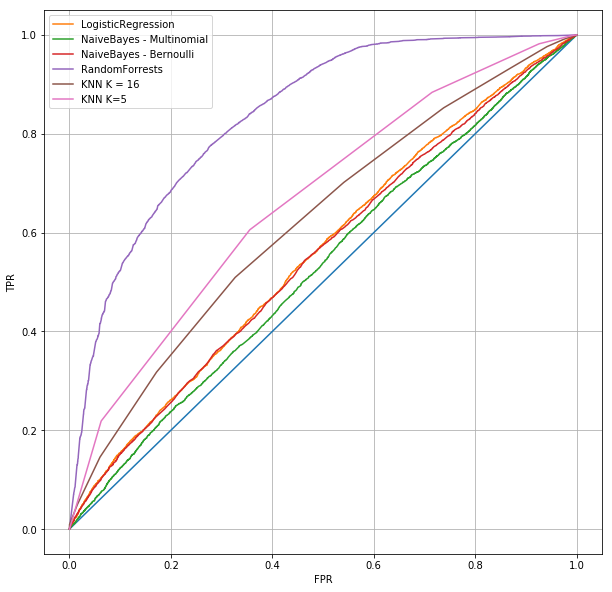

In [72]:
# What about ROC ? 

from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(users, y, test_size=0.2, stratify = y, random_state=1234)

lr_score=lr.predict_proba(xtest)[:,1]
nb_m_score = nb_m.predict_proba(xtest)[:,1]
nb_b_score = nb_b.predict_proba(xtest)[:,1]
rf_score = rf.predict_proba(xtest)[:,1]
knn_score = knn.predict_proba(xtest)[:,1]
knn5_score = knn5.predict_proba(xtest)[:,1]
#l_svm_score = l_svm.predict_proba(xtest)[:,1]

lr_fpr, lr_tpr,_ = roc_curve(ytest, lr_score)
nb_m_fpr, nb_m_tpr,_ = roc_curve(ytest, nb_m_score)
nb_b_fpr, nb_b_tpr,_ = roc_curve(ytest, nb_b_score)
rf_fpr, rf_tpr,_ = roc_curve(ytest, rf_score)
knn_fpr, knn_tpr,_ = roc_curve(ytest, knn_score)
knn5_fpr, knn5_tpr,_ = roc_curve(ytest, knn5_score)
#l_svm_fpr, l_svm_tpr,_ = roc_curve(ytest, l_svm_score)
#roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1])

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(nb_m_fpr,nb_m_tpr, label = 'NaiveBayes - Multinomial')
plt.plot(nb_b_fpr,nb_b_tpr, label = 'NaiveBayes - Bernoulli')
plt.plot(rf_fpr,rf_tpr, label = 'RandomForrests')
plt.plot(knn_fpr,knn_tpr, label = 'KNN K = 16')
plt.plot(knn5_fpr,knn5_tpr, label = 'KNN K=5')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.savefig('RocCurve')